## Importing Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [4]:
df = pd.read_csv('C:/Users/Balaji/Downloads/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df.shape

(4177, 9)

In [9]:
df['Age'] = df['Rings']+1.5
df = df.drop('Rings', axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [10]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


#  Data Analysis & Visualization

## Univariate Analysis

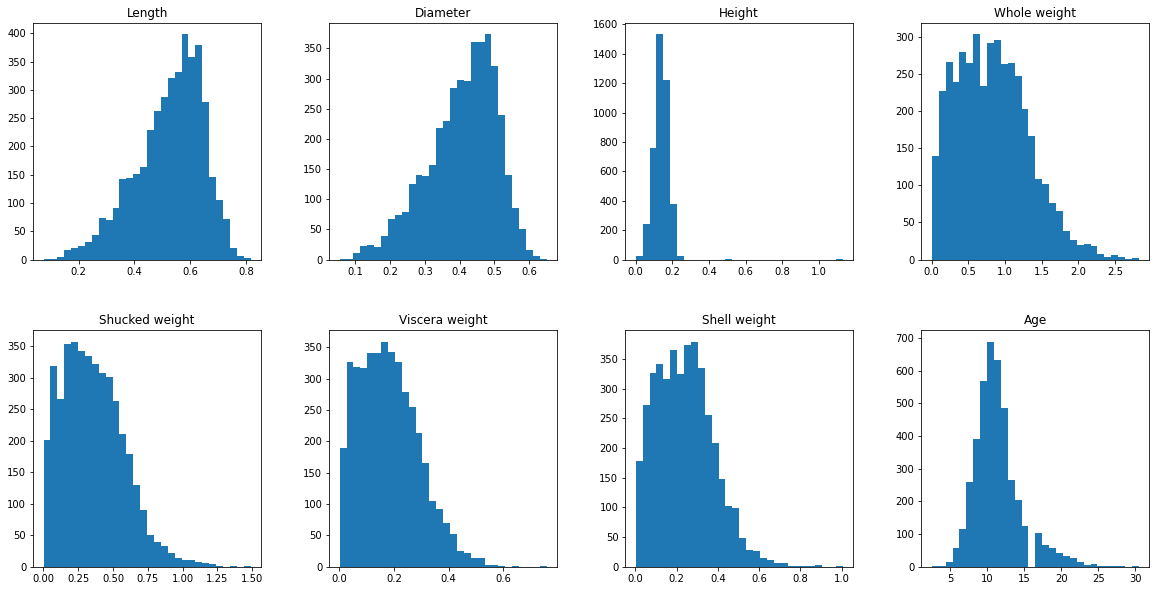

In [19]:
df.hist(figsize=(20,10), grid=False, layout=(2,4), bins=30)
plt.show()

In [20]:
Numerical = df.select_dtypes(include=[np.number]).columns
Categorical = df.select_dtypes(include=[np.object]).columns

In [21]:
skew_values = skew(df[Numerical], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(Numerical), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,Age,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


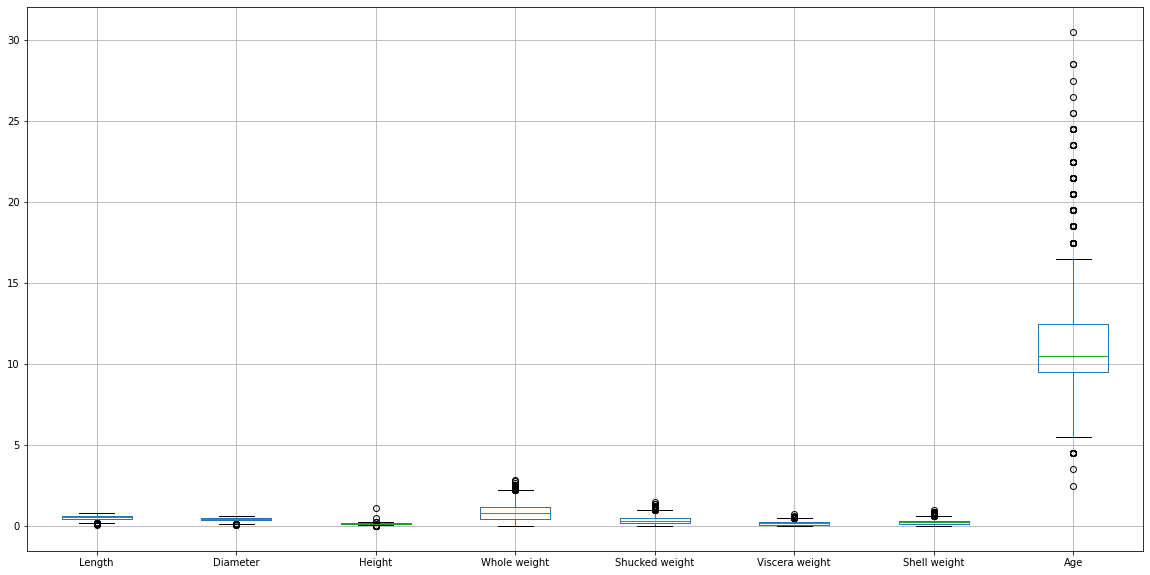

In [23]:
df.boxplot(figsize=(20,10))
plt.show()

<ipython-input-31-f61500c5e113>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


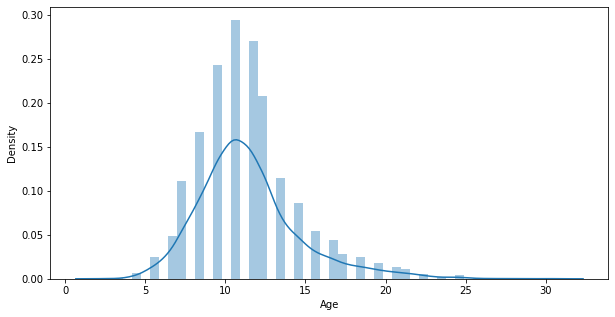

In [31]:
plt.figure(figsize=(10,5))
sns.distplot(df['Age'])
plt.show()

## Bivariate Analysis

In [32]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


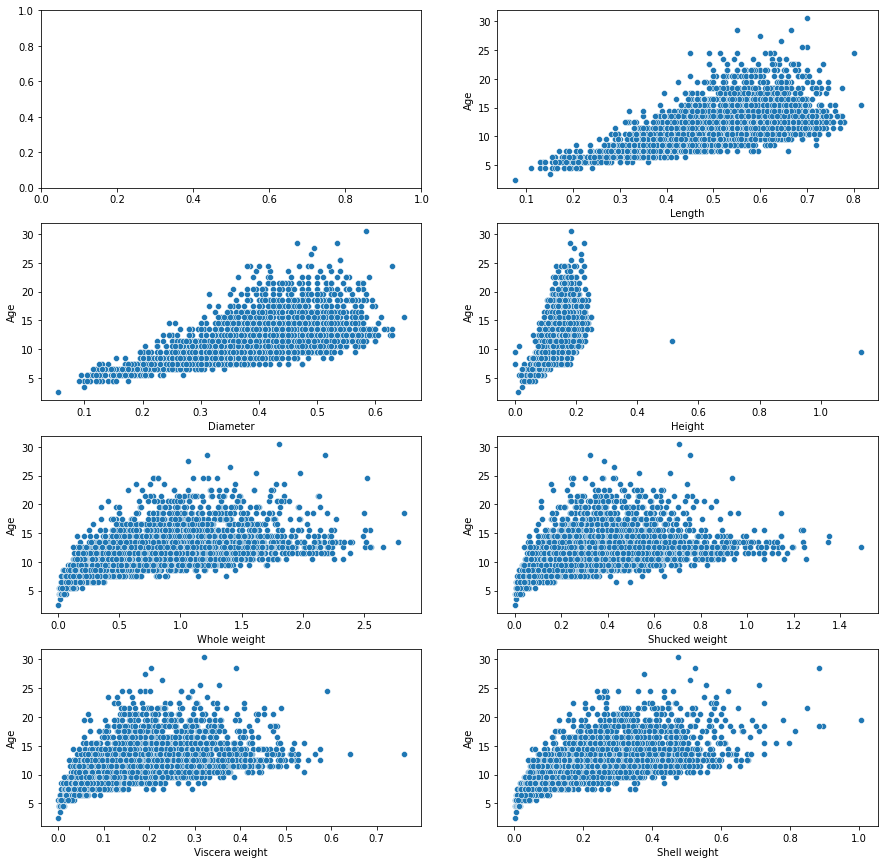

In [38]:
fig, axes = plt.subplots(4,2, figsize=(15,15))
axes = axes.flatten()
for i in range(1,len(df.columns)-1):
    sns.scatterplot(x=df.iloc[:,i], y=df['Age'], ax=axes[i])
plt.show()

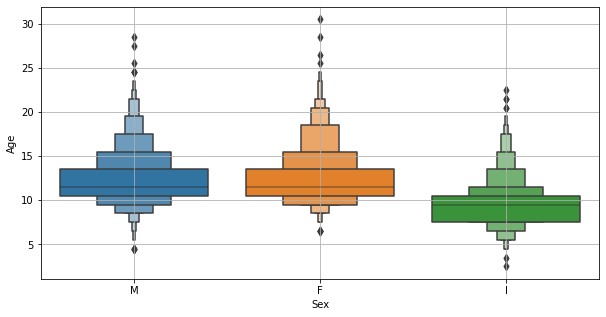

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,12.629304,3.104256,6.5,10.5,11.5,13.5,30.5
I,1342.0,9.390462,2.511554,2.5,7.5,9.5,10.5,22.5
M,1528.0,12.205497,3.026349,4.5,10.5,11.5,13.5,28.5


In [39]:
plt.figure(figsize=(10,5))
sns.boxenplot(y=df['Age'], x=df['Sex'])
plt.grid()
plt.show()
df.groupby('Sex')['Age'].describe()

## Multivariate Analysis

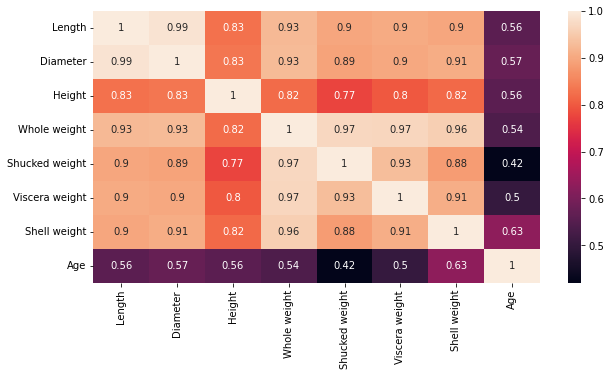

In [40]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

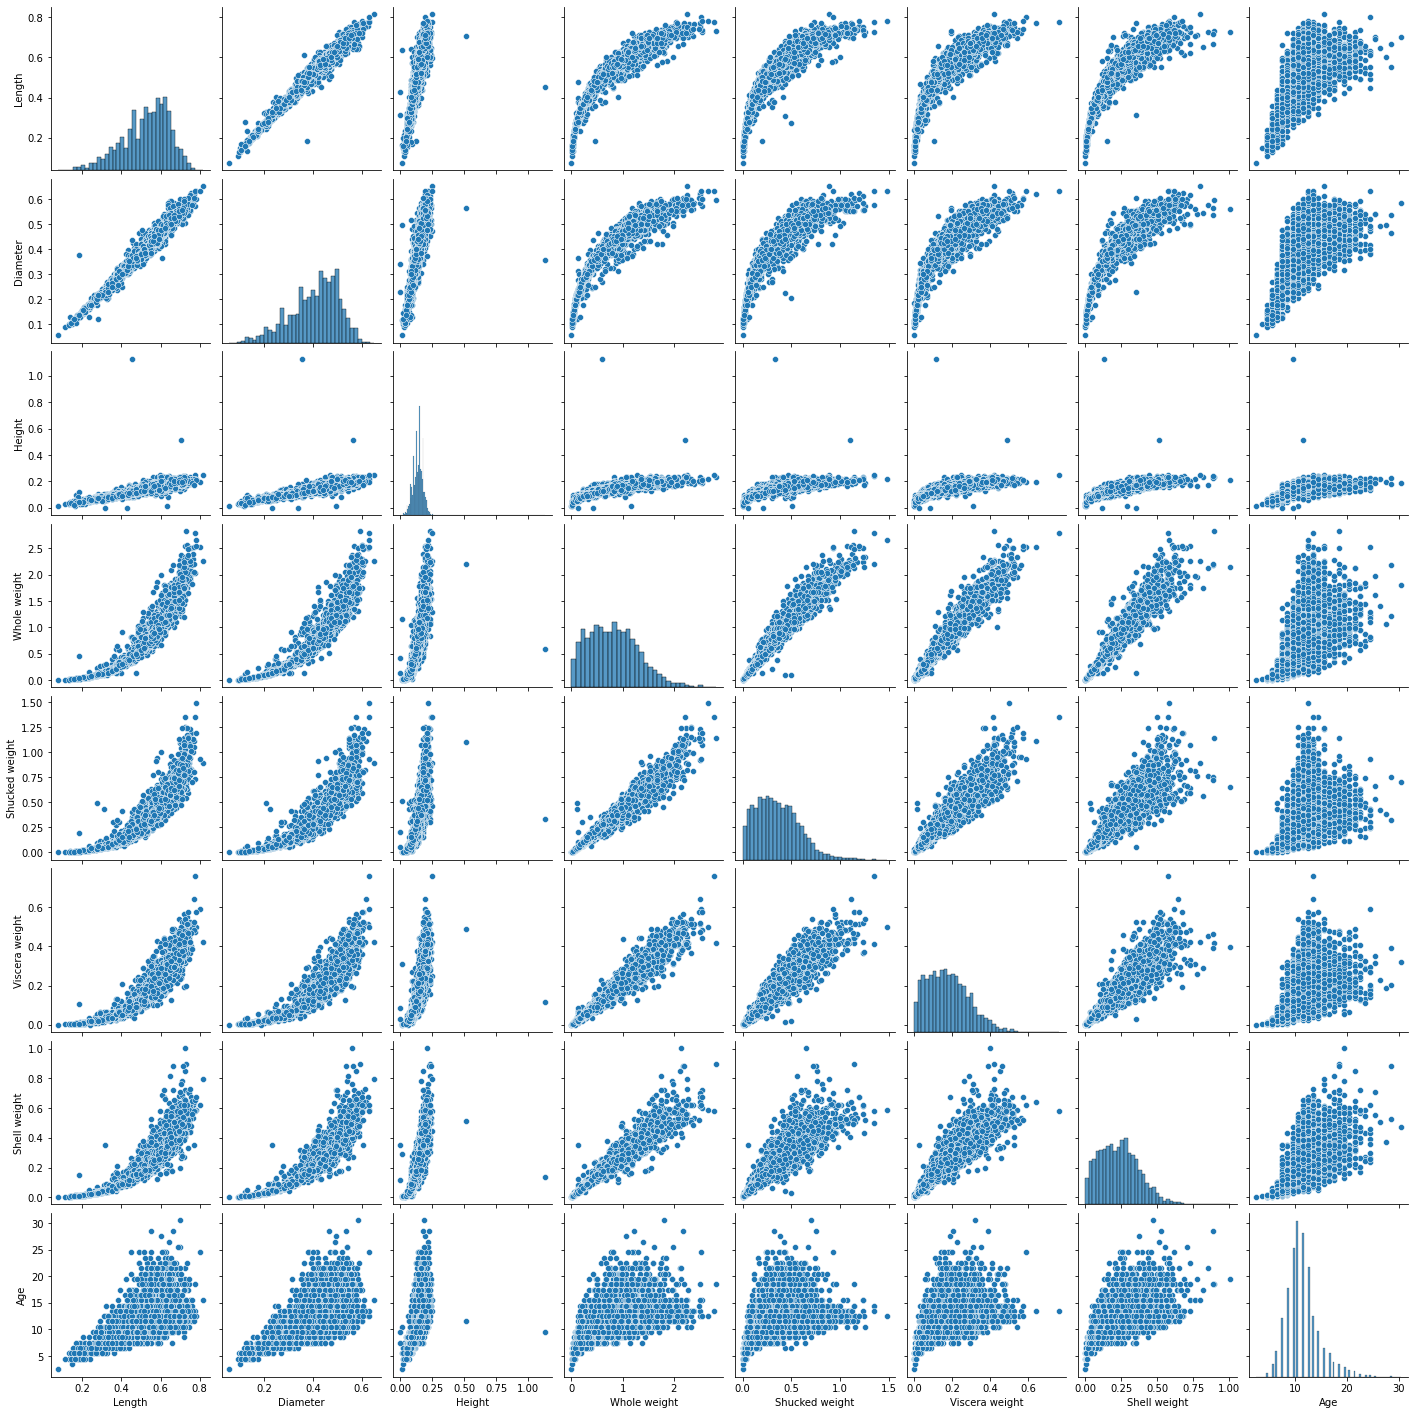

In [41]:
sns.pairplot(df)
plt.show()

# Preprocessing

## Dealing with Categorical Values

In [42]:
#encoding 
df = pd.get_dummies(df, drop_first=True)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,1,0


## Statistical Approach

In [44]:
X = df.drop(['Age'], axis=1)
y = df['Age']

import statsmodels.api as sm

Xc = sm.add_constant(X)
lr = sm.OLS(y, Xc).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     538.9
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:23:37   Log-Likelihood:                -9204.1
No. Observations:                4177   AIC:                         1.843e+04
Df Residuals:                    4167   BIC:                         1.849e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.3946      0.292     18.502      0.000       4.823       5.966
Length            -0.4583      1.809     -0.253      0.800      -4.005       3.089
Diameter          11.0751      2.227      4.972      0.000       6.708      15.442
Height            10.7615      1.536      7.005      0.000       7.750      13.773
Whole weight       8.9754      0.725     12.373      0.000       7.553      10.398
Shucked weight   -19.7869      0.817    -24.209      0.000     -21.389     -18.184
Viscera weight   -10.5818      1.294     -8.179      0.000     -13.118      -8.045
Shell weight       8.7418      1.125      7.772      0.000       6.537      10.947
Sex_I             -0.8249      0.102     -8.056      0.000      -1.026      -0.624
Sex_M              0.0577      0.083      0.692      0.489      -0.106       0.221
==============================================================================
Omnibus:                      947.032   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2710.271
Skew:                           1.181   Prob(JB):                         0.00
Kurtosis:                       6.162   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Regression

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

vif = [VIF(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame(vif, index=Xc.columns, columns=['VIF'])

,VIF
const,73.759239
Length,40.945763
Diameter,42.379841
Height,3.581369
Whole weight,109.768710
Shucked weight,28.550546
Viscera weight,17.445012
Shell weight,21.263272
Sex_I,1.983709
Sex_M,1.398273


In [47]:
X2 = X.drop(['Whole weight'], axis=1)
X2c = sm.add_constant(X2)

vif = [VIF(X2c.values, i) for i in range(X2c.shape[1])]
pd.DataFrame(vif, index=X2c.columns, columns=['VIF'])

,VIF
const,73.686878
Length,40.940595
Diameter,42.362677
Height,3.580291
Shucked weight,8.953621
Viscera weight,10.866542
Shell weight,7.824157
Sex_I,1.980900
Sex_M,1.398218


In [48]:
X2 = X.drop(['Whole weight','Diameter'], axis=1)
X2c = sm.add_constant(X2)

vif = [VIF(X2c.values, i) for i in range(X2c.shape[1])]
pd.DataFrame(vif, index=X2c.columns, columns=['VIF'])

,VIF
const,73.574600
Length,8.071189
Height,3.539481
Shucked weight,8.952049
Viscera weight,10.849613
Shell weight,7.479367
Sex_I,1.957221
Sex_M,1.397178


In [49]:
X2 = X.drop(['Whole weight','Diameter','Viscera weight'], axis=1)
X2c = sm.add_constant(X2)

vif = [VIF(X2c.values, i) for i in range(X2c.shape[1])]
pd.DataFrame(vif, index=X2c.columns, columns=['VIF'])

,VIF
const,72.180555
Length,7.836960
Height,3.524719
Shucked weight,6.154361
Shell weight,6.665183
Sex_I,1.928554
Sex_M,1.392962


In [50]:
lr = sm.OLS(y, X2c).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     746.3
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:31:26   Log-Likelihood:                -9293.0
No. Observations:                4177   AIC:                         1.860e+04
Df Residuals:                    4170   BIC:                         1.864e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.3789      0.295     18.263      0.000       4.801       5.956
Length             7.6264      0.808      9.436      0.000       6.042       9.211
Height            11.8548      1.556      7.618      0.000       8.804      14.906
Shucked weight   -11.6179      0.388    -29.981      0.000     -12.378     -10.858
Shell weight      20.3458      0.643     31.641      0.000      19.085      21.606
Sex_I             -0.9194      0.103     -8.918      0.000      -1.121      -0.717
Sex_M              0.0437      0.085      0.514      0.607      -0.123       0.210
==============================================================================
Omnibus:                     1059.201   Durbin-Watson:                   1.416
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3425.649
Skew:                           1.273   Prob(JB):                         0.00
Kurtosis:                       6.634   Cond. No.                         60.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

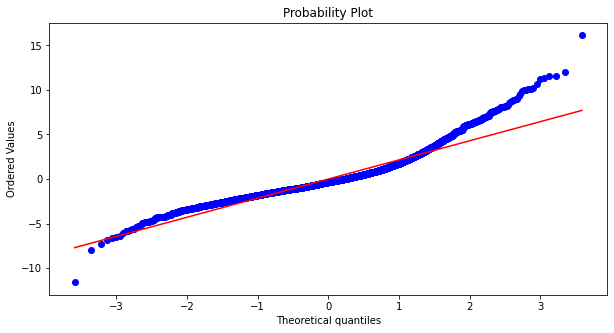

In [69]:
from scipy import stats

resid = lr.resid

plt.figure(figsize=(10,5))
stats.probplot(resid, plot=plt)
plt.show()

<ipython-input-70-c7f844f4d1b4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid, fit=norm)


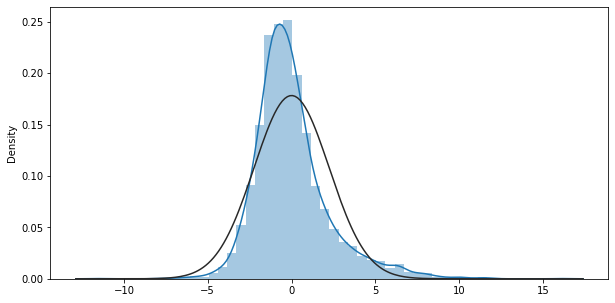

In [70]:
from scipy.stats import norm
norm.fit(resid)

plt.figure(figsize=(10,5))
sns.distplot(resid, fit=norm)
plt.show()

In [71]:
stat, pval = stats.jarque_bera(resid)
print(pval)

0.0


<ipython-input-72-318997ca2382>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X2.iloc[:,i], ax=axes[i])
<ipython-input-72-318997ca2382>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X2.iloc[:,i], ax=axes[i])
<ipython-input-72-318997ca2382>:5: UserWarning: 

`distplot` is a deprecated funct

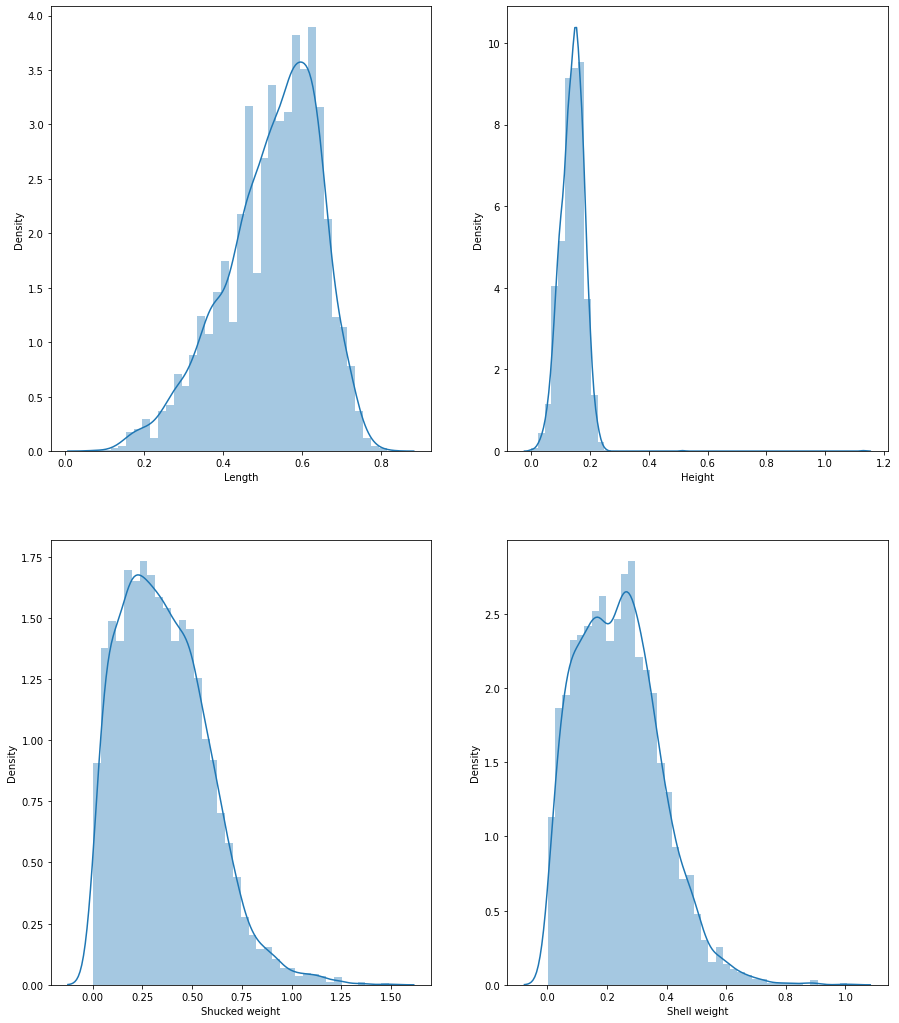

In [72]:
fig, axes = plt.subplots(2,2, figsize=(15,18))
axes = axes.flatten()

for i in range(len(X2.columns)-2):
    sns.distplot(X2.iloc[:,i], ax=axes[i])

plt.show()

In [74]:
while len(X2.columns)>0:
    X_c = sm.add_constant(X2)
    mod = sm.OLS(y,X_c).fit()
    f = mod.pvalues[1:].idxmax()
    if mod.pvalues[1:].max()>0.05:
        X2 = X2.drop(f, axis=1)
    else:
        break

print("The final features are:",X2.columns)

The final features are: Index(['Length', 'Height', 'Shucked weight', 'Shell weight', 'Sex_I'], dtype='object')


In [75]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     895.6
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:44:28   Log-Likelihood:                -9293.2
No. Observations:                4177   AIC:                         1.860e+04
Df Residuals:                    4171   BIC:                         1.864e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.4141      0.286     18.901      0.000       4.852       5.976
Length             7.6066      0.807      9.423      0.000       6.024       9.189
Height            11.8310      1.555      7.606      0.000       8.782      14.880
Shucked weight   -11.6023      0.386    -30.036      0.000     -12.360     -10.845
Shell weight      20.3337      0.643     31.646      0.000      19.074      21.593
Sex_I             -0.9449      0.090    -10.463      0.000      -1.122      -0.768
==============================================================================
Omnibus:                     1057.582   Durbin-Watson:                   1.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3415.593
Skew:                           1.271   Prob(JB):                         0.00
Kurtosis:                       6.628   Cond. No.                         57.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Train, Test and Split

In [76]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,1,0


In [77]:
X = df.drop('Age', axis=1)
y = df['Age']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [78]:
#Base model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_trains, y_train)
pred = lr.predict(X_tests)

from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("The root mean Sq error calculated from the base model is:",rmse)
print("The r2-score is:",r2)

The root mean Sq error calculated from the base model is: 2.2102250617835075
The r2-score is: 0.5408490346490895


In [79]:
#selecting best feautre
from sklearn.feature_selection import RFE
lr = LinearRegression()
n = [{'n_features_to_select':list(range(1,10))}]
rfe = RFE(lr)

from sklearn.model_selection import GridSearchCV
gsearch = GridSearchCV(rfe, param_grid=n, cv=3)
gsearch.fit(X, y)

gsearch.best_params_

{'n_features_to_select': 8}

In [80]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X,y)

pd.DataFrame(rfe.ranking_, index=X.columns, columns=['Class'])

,Class
Length,1
Diameter,1
Height,1
Whole weight,1
Shucked weight,1
Viscera weight,1
Shell weight,1
Sex_I,1
Sex_M,2


The RFE says that all features are significant except Sex_M

## Performance of our Model using multiple Algorithms

In [81]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict

models = [   SVR(),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4)]
results = []
names = ['SVM','Random Forest','Gradient Boost','K-Nearest Neighbors']
for model,name in zip(models,names):
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    rmse = np.sqrt(mean_squared_error(y, cross_val_predict(model, X , y, cv=3)))
    results.append(rmse)
    names.append(name)
    msg = "%s: %f" % (name, rmse)
    print(msg)

SVM: 2.306551
Random Forest: 2.232707
Gradient Boost: 2.196020
K-Nearest Neighbors: 2.353608


The above algorithms gives the similar performance related to our Model